<a href="https://colab.research.google.com/github/billiahkerubo1/Hass-Consulting-Company-Price-Analysis/blob/main/Hass_Consulting_Company_Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS ON PRICE LEVELS BY HASS CONSULTING COMPANY**

# Defining the question.

Hass Consulting Company is a real estate company that uses information available to make predictions on the price lvel of houses given the features. The available independent variables include bathrooms and bedrooms, which can be used to determine the influence they have on the house prices. Regression will help solve this.

# Specifying the question

What are the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

# Defining the metrics of success


The metrics for success is doing regression on the given information to understand the data, both the features and the target variable(price), to understand how each of them influence one another. The types of regression to be done are multiple linear regression, quantile, Ridge, Lasso and Elastic Net regression.

# Understanding the context

The company needs to get accurate understanding of the data to make the right edcisions. Therefore, this explains the need to use all the regression types mentioned, to get as many accurate insights as possible.

Recording the Experimental Design


1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5.Challenging the solution

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 2. Loading and reading the dataset

In [2]:
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


In [3]:
# previewing our first records
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [4]:
# previewing the last records
df.tail(30)

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
21583  2025049203   399950.0         2  ... -122.329           1370        1173
21584   952006823   380000.0         3  ... -122.384           1310        1415
21585  3832050760   270000.0         3  ... -122.055           2170        5399
21586  2767604724   505000.0         2  ... -122.381           1430        1249
21587  6632300207   385000.0         3  ... -122.309           1520        1497
21588  2767600688   414500.0         2  ... -122.375           1210        1118
21589  7570050450   347500.0         3  ... -122.022           2540        4571
21590  7430200100  1220000.0         4  ... -122.066           4560       11063
21591  4140940150   572000.0         4  ... -122.232           1810        5641
21592  1931300412   475000.0         3  ... -122.346           1180        1224
21593  8672200110  1090000.0         5  ... -122.181           3030        7980
21594  5087900040   350000.0         4  ... -122.107           2530        5988
21595  1972201967   520000.0         2  ... -122.346           1530        1282
21596  7502800100   679950.0         5  ... -122.131           3550        9421
21597   191100405  1580000.0         4  ... -122.223           2290       10125
21598  8956200760   541800.0         4  ... -122.264           2673        6500
21599  7202300110   810000.0         4  ... -122.046           3370        6814
21600   249000205  1540000.0         5  ... -122.200           2780        8964
21601  5100403806   467000.0         3  ... -122.318           1285        1253
21602   844000965   224000.0         3  ... -122.002           1320       11303
21603  7852140040   507250.0         3  ... -121.881           2270        5731
21604  9834201367   429000.0         3  ... -122.288           1400        1230
21605  3448900210   610685.0         4  ... -122.167           2520        6023
21606  7936000429  1010000.0         4  ... -122.398           2050        6200
21607  2997800021   475000.0         3  ... -122.409           1330        1265
21608   263000018   360000.0         3  ... -122.346           1530        1509
21609  6600060120   400000.0         4  ... -122.362           1830        7200
21610  1523300141   402101.0         2  ... -122.299           1020        2007
21611   291310100   400000.0         3  ... -122.069           1410        1287
21612  1523300157   325000.0         2  ... -122.299           1020        1357

[30 rows x 20 columns]

In [5]:
# checking the size of the dataset
df.shape

(21613, 20)

The dataset has 21610 rows and 20 columns

In [6]:
# checking the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
# checking for unique values
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# 3. Data Cleaning

In [8]:
# checking for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset

In [9]:
# checking for duplicate values
df.duplicated().sum()

3

There are 3 duplicated values. and they have to be removed. 

In [10]:
# Removing the duplicates
df.drop_duplicates(inplace = True)

In [11]:
# Checking if the duplicated values have been dropped
df.duplicated().sum()

0

The duplicate values have been dropped. 

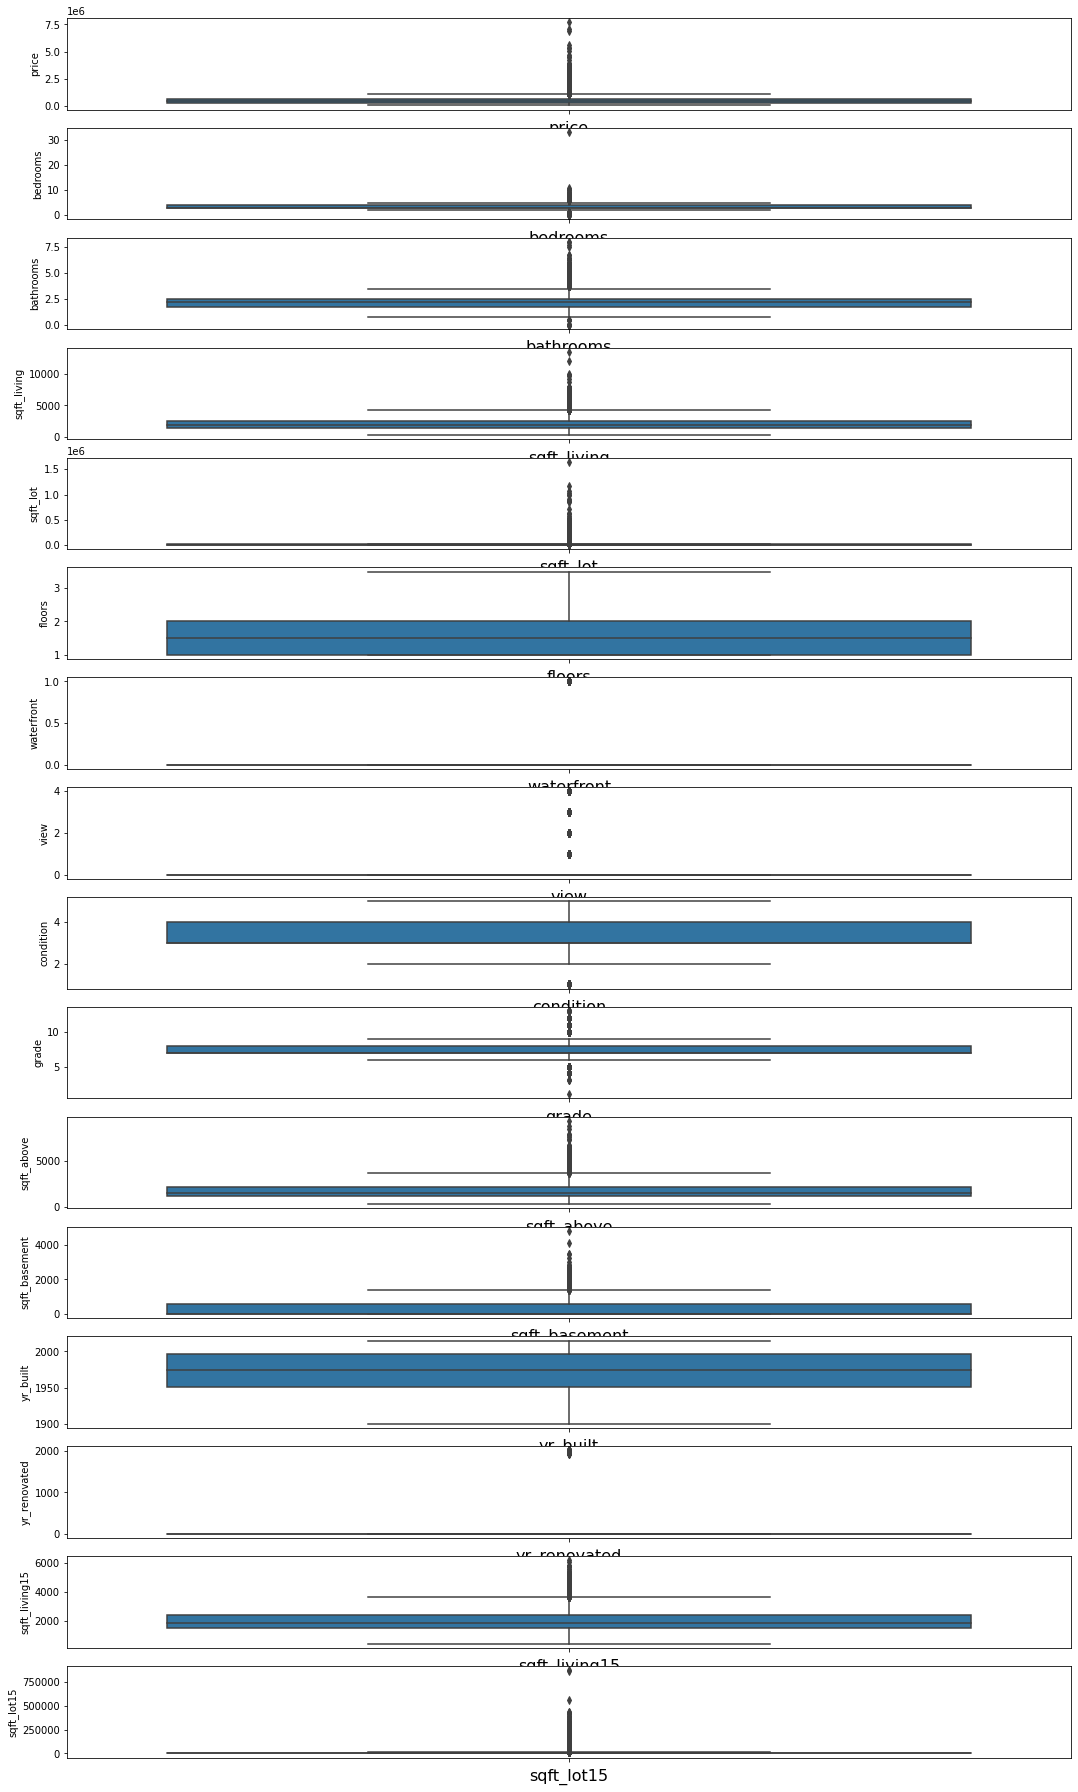

In [12]:
# checking for outliers
columns = ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'sqft_living15',	'sqft_lot15']
fig, ax = plt.subplots(len(columns), figsize=(18,32))

for i, col_val in enumerate(columns):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=16);

plt.show();

There are outliers in all the columns except in the year renovated and floors columns. However we will not drop them because they represent real world values that are informative in our analysis.

# 4. Exploratory Data Analysis

##           a. Univariate Analysis

In [13]:
# making a copy of our dataframe 
df1 = df.copy()

In [14]:
# univariate summaries
df1.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161000e+04  2.161000e+04  ...   21610.000000   21610.000000
mean   4.580161e+09  5.401789e+05  ...    1986.518695   12769.031976
std    2.876547e+09  3.673876e+05  ...     685.425781   27305.972464
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.216125e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

In [15]:
# Getting the mean
df1[['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'sqft_living15',	'sqft_lot15']].mean()

price            540178.944840
bedrooms              3.370847
bathrooms             2.114739
sqft_living        2079.881212
sqft_lot          15108.289820
floors                1.494239
waterfront            0.007543
view                  0.234197
condition             3.409440
grade                 7.656779
sqft_above         1788.347894
sqft_basement       291.533318
yr_built           1971.003609
yr_renovated         84.322351
sqft_living15      1986.518695
sqft_lot15        12769.031976
dtype: float64

In [16]:
#  checking for standard deviation, variance, skewness and kurtosis
for column in columns:
  print('\n')
  print(column + ', Standard deviation: '+ str(df1[column].std()))
  print(column + ', Variance: '+ str(df1[column].var()))
  print(column + ', Skewness: '+ str(df1[column].skew()))
  print(column + ', Kurtosis: '+ str(df1[column].kurt()))



price, Standard deviation: 367387.58505388984
price, Variance: 134973637651.72916
price, Skewness: 4.021467451317612
price, Kurtosis: 34.517437729615054


bedrooms, Standard deviation: 0.9301096999846462
bedrooms, Variance: 0.8651040540055286
bedrooms, Skewness: 1.9742435470953739
bedrooms, Kurtosis: 49.06010825423431


bathrooms, Standard deviation: 0.770203702285374
bathrooms, Variance: 0.593213743014097
bathrooms, Skewness: 0.5111642830477003
bathrooms, Kurtosis: 1.2796371646131974


sqft_living, Standard deviation: 918.5002986169898
sqft_living, Variance: 843642.7985594993
sqft_living, Skewness: 1.4715321846904306
sqft_living, Kurtosis: 5.242222911342459


sqft_lot, Standard deviation: 41423.2267370033
sqft_lot, Variance: 1715883713.305185
sqft_lot, Skewness: 13.059170061304911
sqft_lot, Kurtosis: 285.0406214916321


floors, Standard deviation: 0.5399935009500416
floors, Variance: 0.2915929810682826
floors, Skewness: 0.6165225291724865
floors, Kurtosis: -0.4842457226464969


wate

In [17]:
# Interquantile range

for column in columns:
  print('\n')
  print(df1[column].quantile([0.25, 0.5, 0.75]))



0.25    321612.5
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64


0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64


0.25    1425.5
0.50    1910.0
0.75    2550.0
Name: sqft_living, dtype: float64


0.25     5040.00
0.50     7619.00
0.75    10688.75
Name: sqft_lot, dtype: float64


0.25    1.0
0.50    1.5
0.75    2.0
Name: floors, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: waterfront, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: view, dtype: float64


0.25    3.0
0.50    3.0
0.75    4.0
Name: condition, dtype: float64


0.25    7.0
0.50    7.0
0.75    8.0
Name: grade, dtype: float64


0.25    1190.0
0.50    1560.0
0.75    2210.0
Name: sqft_above, dtype: float64


0.25      0.0
0.50      0.0
0.75    560.0
Name: sqft_basement, dtype: float64


0.25    1951.0
0.50    1975.0
0.75    1997.0
Name: yr_built, dtype: float64


0.25    0.0
0.50    0.0
0.75    0

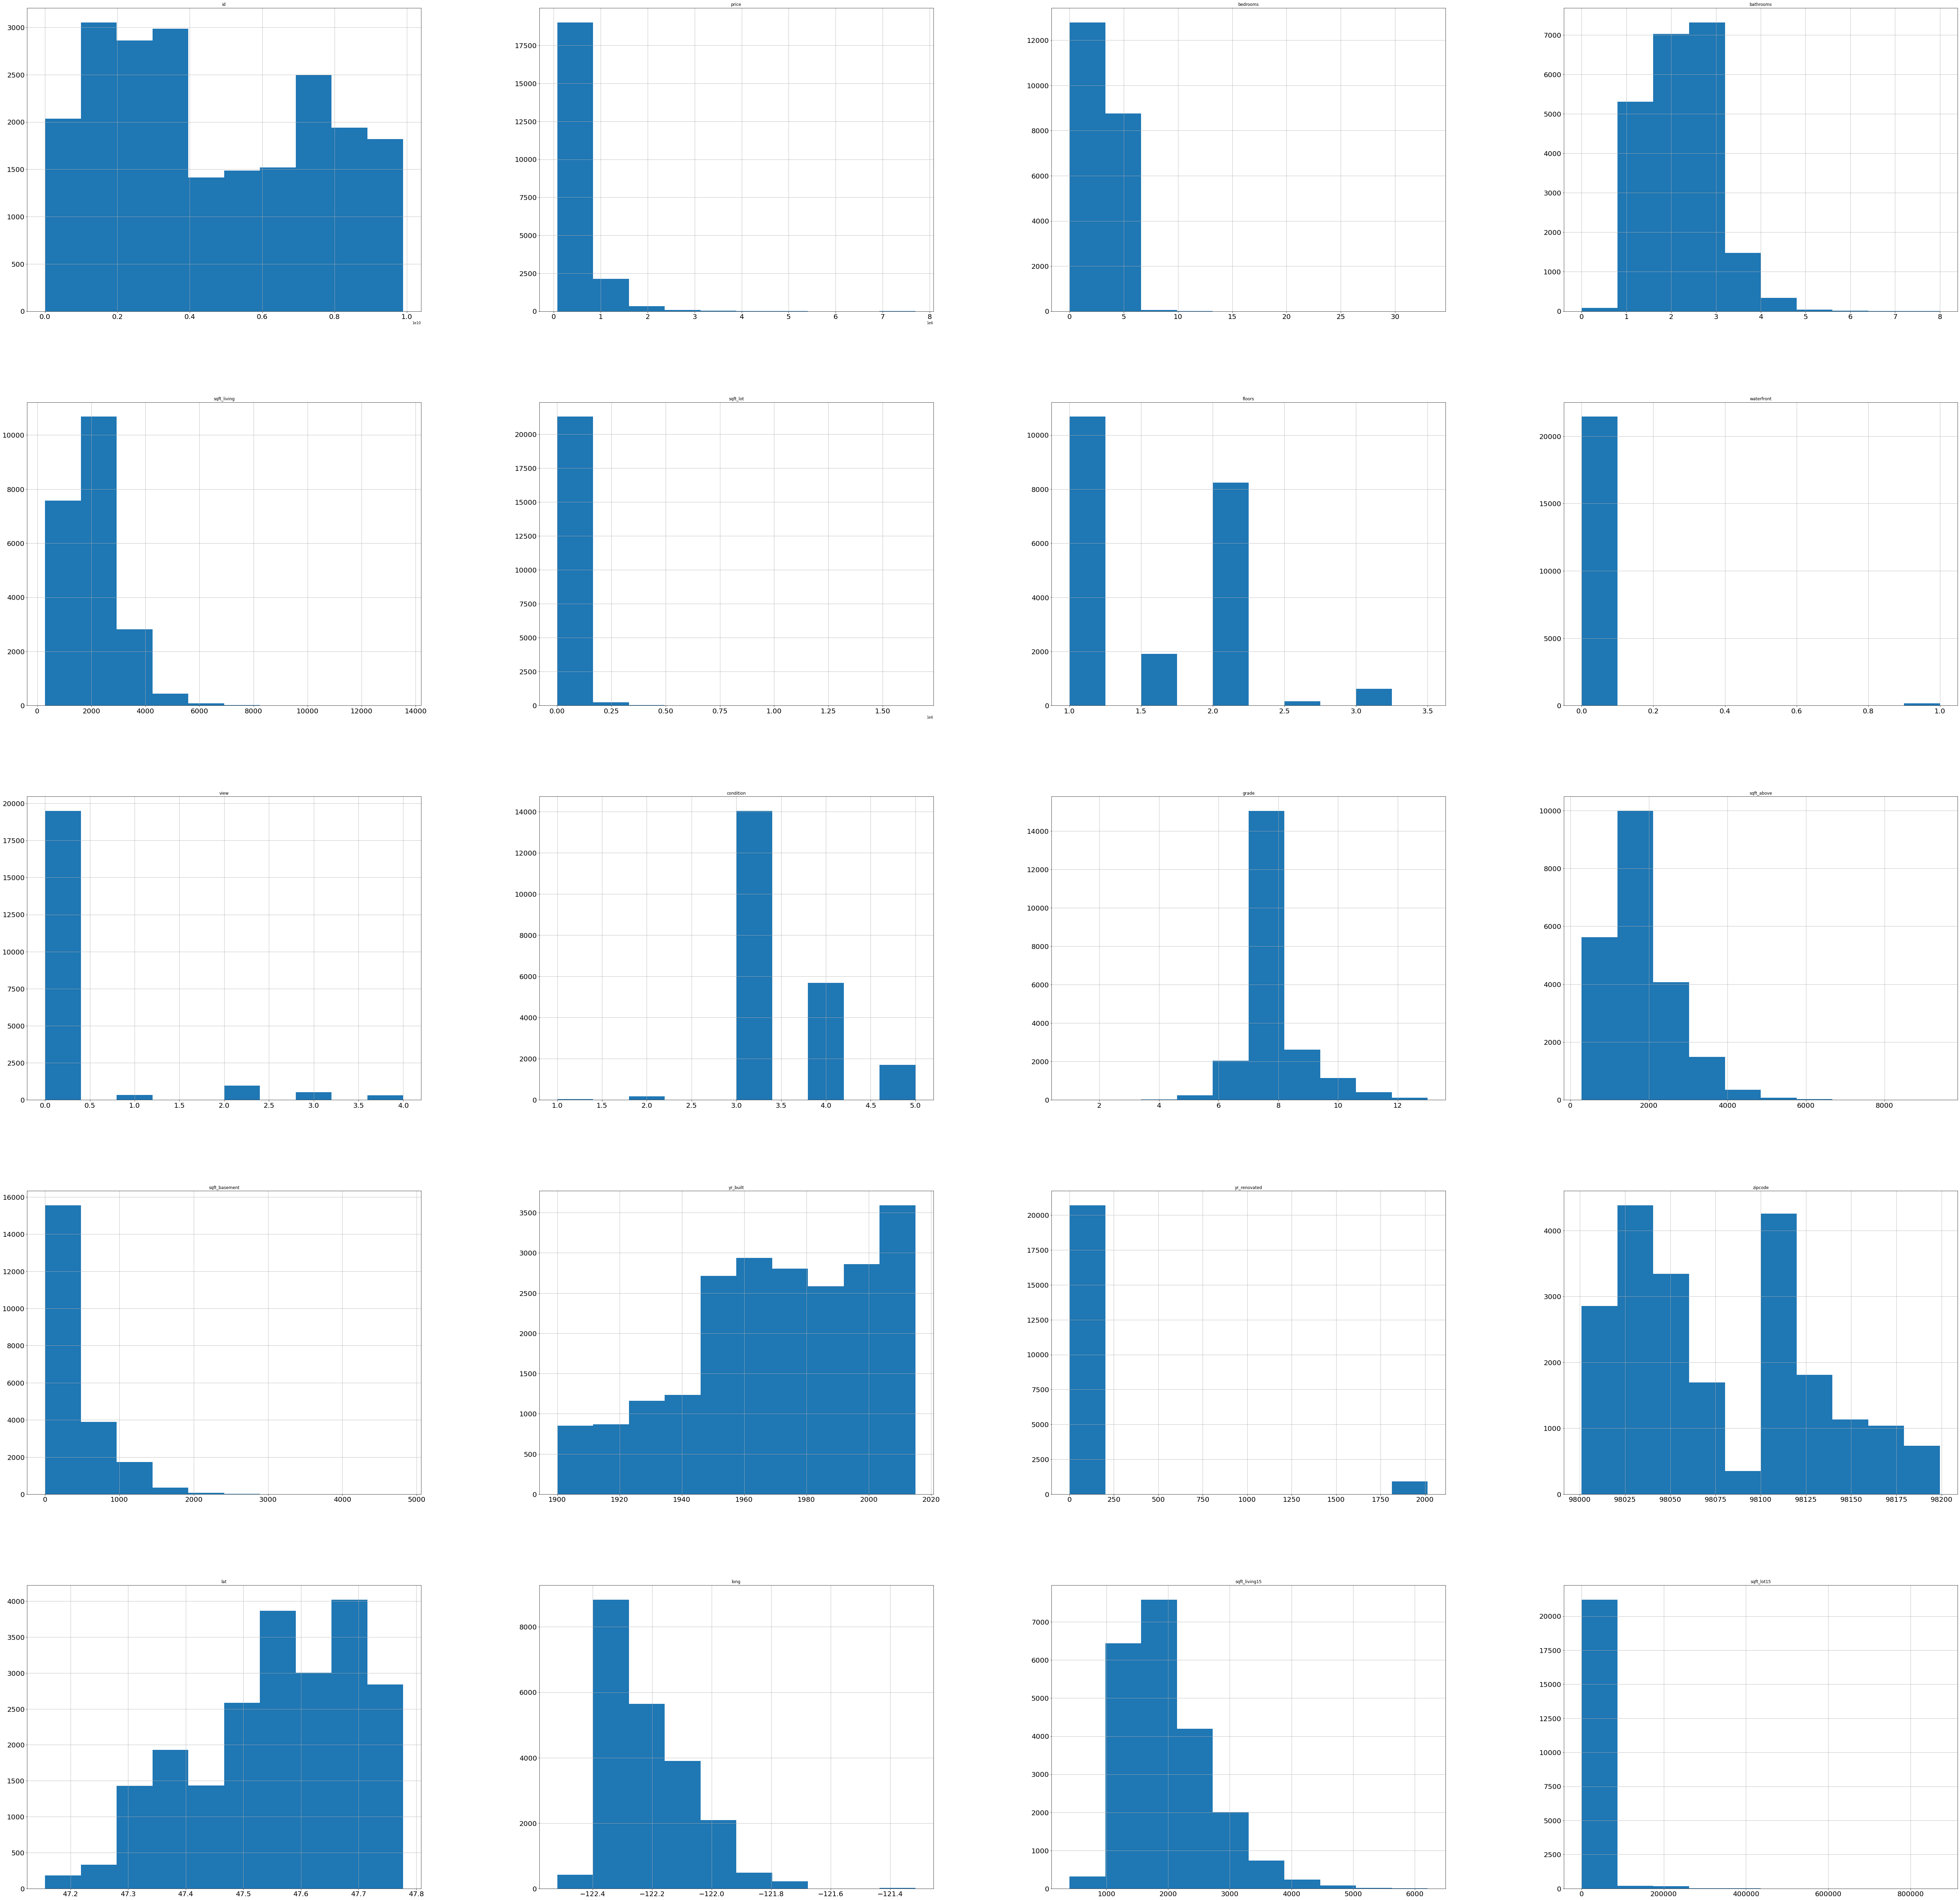

In [18]:
# histograms to show distributions
df1.hist(figsize=(100,100), sharex=False, sharey=False, xlabelsize= 20, ylabelsize=20)
plt.show()

There is no variable that is normally distributed. Therefore, there is need for MinMax scaling for normality.

## b. Bivariate Analysis

In [19]:
# Check for correlation to see how the variables influence each other
df_corr = df1.drop(columns = 'id')
correlations = df_corr.corr()
correlations

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308346  ...       0.585382    0.082457
bedrooms       0.308346  1.000000  ...       0.391633    0.029233
bathrooms      0.525140  0.515935  ...       0.568665    0.087191
sqft_living    0.702046  0.576674  ...       0.756420    0.183285
sqft_lot       0.089658  0.031699  ...       0.144620    0.718556
floors         0.256793  0.175448  ...       0.279861   -0.011250
waterfront     0.266332 -0.006583  ...       0.086469    0.030702
view           0.397466  0.079433  ...       0.280404    0.072577
condition      0.036397  0.028422  ...      -0.092854   -0.003424
grade          0.667478  0.357003  ...       0.713208    0.119265
sqft_above     0.605569  0.477619  ...       0.731870    0.194060
sqft_basement  0.323849  0.303077  ...       0.200367    0.017260
yr_built       0.053980  0.154276  ...       0.326298    0.070999
yr_renovated   0.126503  0.018695  ...      -0.002841    0.007837
zipcode       -0.053162 -0.152721  ...      -0.279033   -0.147257
lat            0.306922 -0.008953  ...       0.048839   -0.086423
long           0.021567  0.129474  ...       0.334592    0.254475
sqft_living15  0.585382  0.391633  ...       1.000000    0.183194
sqft_lot15     0.082457  0.029233  ...       0.183194    1.000000

[19 rows x 19 columns]

The sqft_above is positively correlated with price by 0.60. An increase in unit sqft_above influences an incrreas in price by 60% and vice versa.

The grade influences price by 0.66. A unit increase in grade influences an increase in price by 66%.

Sqft_living is strongly and positively correlated with price by 0.7. A unit increase in sqft_living influences aan increase in price by 70%.

The sqft_living is positively correlated with bathrooms by 0.75.

The sqft_above is positively correlated with sqft_living by 0.87.

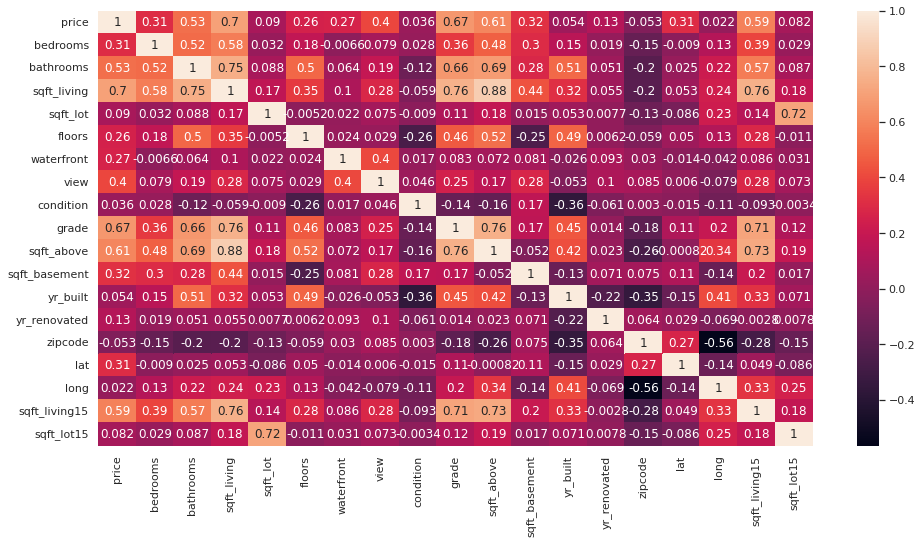

In [20]:
#correlation between variables on a heatmap
correlation = df_corr.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)


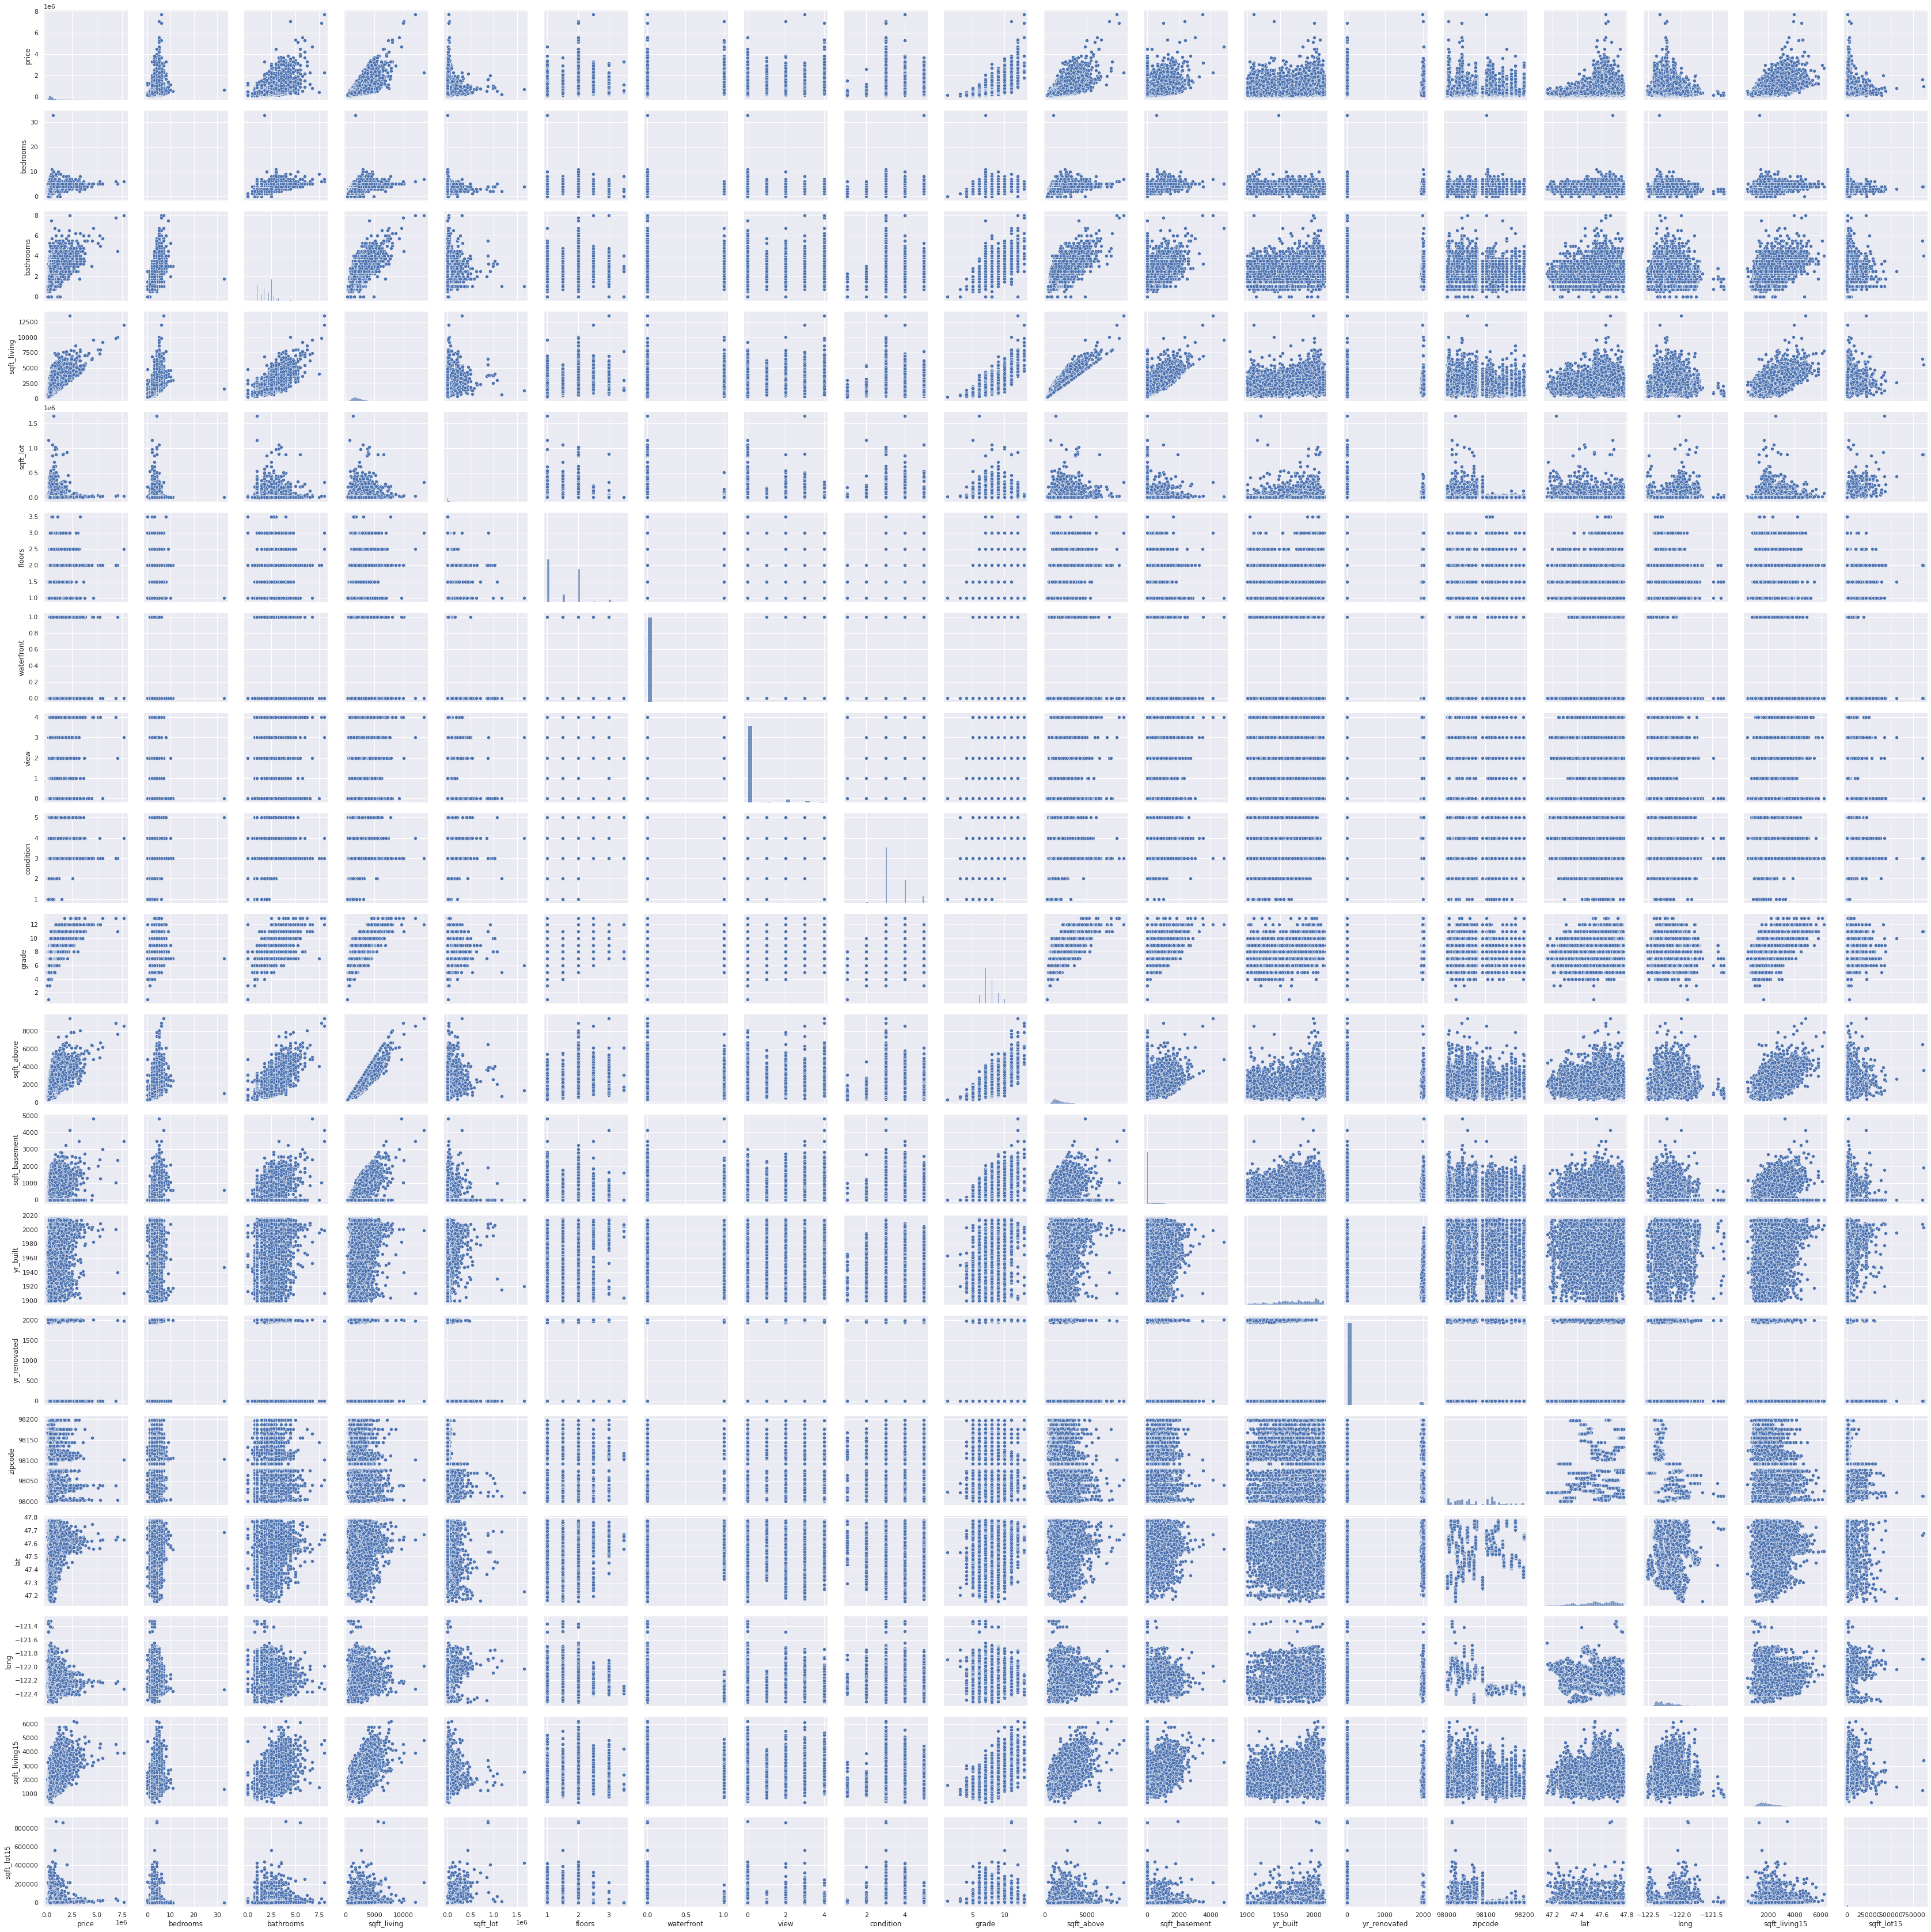

In [21]:
# Description using paiplot
sns.pairplot(df_corr)
plt.show()

The pairplot visualize the above correlations. 

## c. Multivariate Analysis

We conduct Multivariate analysis to do the analysis that cannot be handled by both univariate and bivariate analysis. 

In this case, we will use Linear Discriminant Analysis. This is because the goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting ("curse of dimensionality") and also reduce computational costs.

In [22]:
# The fist process is to divide the dataset into features and target variable
X = df1[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','sqft_living15','yr_built', 'yr_renovated']].values
y = df1['price'].values

In [23]:
# Dividing the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#Feature scaling:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [26]:
#Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [27]:
#Evaluating the Performance 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.013419713095788986


This is a low accuracy, calling for further analysis. There are no correct predictions as shown by the 0 values along the main diagonal.

# 4. Regression Analysis

## a. Multiple Linear Regression

Multiple Linear Regression uses several explanatory variables to predict the outcome of the dependent variable. In this case, price is the dependent variable being explained by the other factors in the dataset. 

Before doing multiple regression, we will get correlation on independent variables only, by dropping the price variable since it is our dependent variable. After that we will use the correlations obtained to compute the VIF score for each variable. This will require linear algebra.

In [28]:
# Dropping the price column and then getting correlation on the independent variables
independent_var = df_corr.drop(columns = ['price'])

corr = independent_var.corr()
corr

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.515935  ...       0.391633    0.029233
bathrooms      0.515935   1.000000  ...       0.568665    0.087191
sqft_living    0.576674   0.754688  ...       0.756420    0.183285
sqft_lot       0.031699   0.087750  ...       0.144620    0.718556
floors         0.175448   0.500669  ...       0.279861   -0.011250
waterfront    -0.006583   0.063747  ...       0.086469    0.030702
view           0.079433   0.187891  ...       0.280404    0.072577
condition      0.028422  -0.124940  ...      -0.092854   -0.003424
grade          0.357003   0.664990  ...       0.713208    0.119265
sqft_above     0.477619   0.685351  ...       0.731870    0.194060
sqft_basement  0.303077   0.283814  ...       0.200367    0.017260
yr_built       0.154276   0.505997  ...       0.326298    0.070999
yr_renovated   0.018695   0.050879  ...      -0.002841    0.007837
zipcode       -0.152721  -0.203831  ...      -0.279033   -0.147257
lat           -0.008953   0.024590  ...       0.048839   -0.086423
long           0.129474   0.223047  ...       0.334592    0.254475
sqft_living15  0.391633   0.568665  ...       1.000000    0.183194
sqft_lot15     0.029233   0.087191  ...       0.183194    1.000000

[18 rows x 18 columns]

In [29]:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.652159  -0.461426  ...       0.025284    0.085416
bathrooms     -0.461426   3.351248  ...       0.092020    0.071444
sqft_living    0.282730  -0.908676  ...       2.673029    0.393958
sqft_lot       0.049327  -0.024033  ...       0.163933   -1.459308
floors         0.049848  -0.675409  ...       0.272632    0.072657
waterfront     0.063078   0.010097  ...       0.054397   -0.018480
view           0.114430  -0.042387  ...      -0.325388   -0.007469
condition     -0.050633  -0.137265  ...       0.075908   -0.028242
grade          0.306941  -0.267927  ...      -0.911600    0.071863
sqft_above    -1.130081  -0.453801  ...      -3.945719   -0.530915
sqft_basement -0.620609  -0.641548  ...      -1.759154   -0.249402
yr_built       0.134509  -0.935745  ...       0.077695   -0.033746
yr_renovated   0.045800  -0.260436  ...       0.099266   -0.022195
zipcode        0.080174   0.041789  ...       0.210240   -0.015488
lat            0.050839  -0.041080  ...      -0.094792    0.036656
long           0.017554   0.053741  ...      -0.354493   -0.160875
sqft_living15  0.025284   0.092020  ...       2.979647   -0.125593
sqft_lot15     0.085416   0.071444  ...      -0.125593    2.135659

[18 rows x 18 columns]

The VIF score for each variable is found alongside the downwards sloping. The sqft_basement has a VIF score of 5.348750e+13.This is a high value, meaning it could be predicted by other indepenednt variables. Other variables with high values also include sqft_living and sqft_above. We will have to check if the scores improve if we remove them from our dataset

In [30]:
revised = independent_var.drop(columns=['sqft_basement','sqft_above', 'sqft_living'])

corr = revised.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)



bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.459639  -0.797621  ...      -0.255790    0.052407
bathrooms     -0.797621   2.695228  ...      -0.329150    0.020730
sqft_lot       0.015625  -0.070430  ...       0.102139   -1.466339
floors         0.072855  -0.470760  ...       0.139986    0.060065
waterfront     0.047175  -0.006948  ...       0.020338   -0.022285
view           0.081416  -0.151196  ...      -0.321881   -0.007985
condition     -0.057630  -0.173065  ...       0.089528   -0.027071
grade          0.013440  -0.706067  ...      -1.415296    0.014060
yr_built       0.242510  -0.754958  ...       0.243273   -0.014442
yr_renovated   0.043538  -0.266856  ...       0.098462   -0.022335
zipcode        0.057631  -0.004826  ...       0.184653   -0.018624
lat            0.063493  -0.052337  ...      -0.042606    0.042179
long          -0.007161   0.072536  ...      -0.453193   -0.171342
sqft_living15 -0.255790  -0.329150  ...       2.498875   -0.180790
sqft_lot15     0.052407   0.020730  ...      -0.180790    2.129302

[15 rows x 15 columns]

There is quite a difference in the VIF score after the three columns were dropped. The variables that changed with a big value are the variables that were highly correlated with the dropped variables.

In [75]:
# specifying the features and the target variable

X = revised[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_living15','yr_built', 'yr_renovated']]
y = df1['price']

In [76]:
# Dividing the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
#Feature scaling:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
#regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [79]:
# This is our prediction for the price based on our model
y_predict = regressor.predict(X_test)
y_predict



array([589020.89585085, 566726.38935522, 296159.6236749 , ...,
       461066.51363615, 550999.66333879, 403552.73976957])

In [81]:
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

comparison_frame.describe()
  

Actual     Predicted
count  4.322000e+03  4.322000e+03
mean   5.434344e+05  5.413054e+05
std    3.625612e+05  2.972605e+05
min    8.100000e+04 -7.910010e+05
25%    3.230000e+05  3.448665e+05
50%    4.500000e+05  4.824641e+05
75%    6.500000e+05  6.685740e+05
max    4.000000e+06  2.353214e+06

The minimum, maximum  and standard deviation values are quite apart in the actual and predicted values. 

In [82]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-2128.980962837368

The residuals mean is not close to zero. This could be as a result of outliers. 

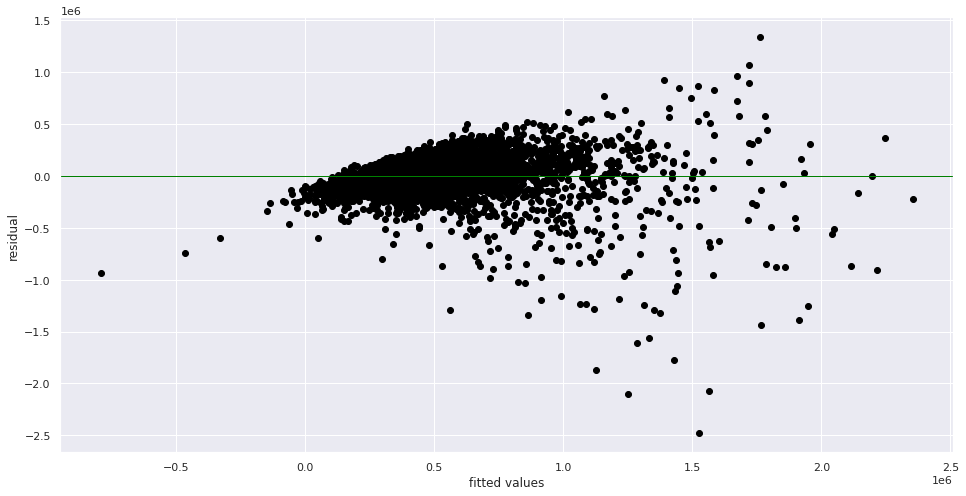

In [83]:
# plotting the residuals for better understanding
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

To understand the residuals even more,heteroscedasticity test will be appropriate.

In [84]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)
print(test_result, p_value)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



384.26530196509015 1.466734227943987e-85
inf
the variances are homogeneous!


The variances are homogeneous, meaning the variances are equal.

In [85]:
# Evaluating the model using other metrics
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  



Mean Absolute Error: 143373.12011072077
Mean Squared Error: 48445433125.730515
Root Mean Squared Error: 220103.2328834143


The error value is quite big.

In [86]:
# Evaluating the line of best fit using R-squared
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.6313699301292856

The R-squared value is moderately high. 63% of variance in y-predict is explained by the features.

## b. Quantile Regression

Quantile regression is applicable in cases where the error term does not have a constant variance across the independent variables.

In [88]:
# fit a linear regression

model = LinearRegression(fit_intercept = True, normalize = False)
model.fit(X,y)

y_pred2 = model.predict(X)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model.score(X,y)))



Mean squared error: 51252482759.31
Variance score: 0.62


In [89]:
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
model1 = smf.quantreg('y ~ X', revised).fit(q=.5)

# Then print out the summary of our model
#
print(model1.summary())



                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3389
Model:                       QuantReg   Bandwidth:                   2.684e+04
Method:                 Least Squares   Sparsity:                    3.902e+05
Date:                Sat, 12 Feb 2022   No. Observations:                21610
Time:                        19:43:11   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.997e+05   1.23e+05      7.296      0.000    6.58e+05    1.14e+06
X[0]        3.009e+04   1717.879     17.517      0.000    2.67e+04    3.35e+04
X[1]        1.173e+04   2824.723      4.154      0.000    6196.065    1.73e+04
X[2]        5085.8382   3092.275      1.645      0.1

In [90]:
# checking for quantile = 0.8
model2 = smf.quantreg('y ~ X',revised ).fit(q=0.8)

#view model summary
print(model2.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4541
Model:                       QuantReg   Bandwidth:                   2.232e+04
Method:                 Least Squares   Sparsity:                    5.613e+05
Date:                Sat, 12 Feb 2022   No. Observations:                21610
Time:                        19:43:22   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.156e+06   1.55e+05     39.783      0.000    5.85e+06    6.46e+06
X[0]        2091.7472   2266.653      0.923      0.356   -2351.061    6534.555
X[1]        8.895e+04   3546.694     25.078      0.000     8.2e+04    9.59e+04
X[2]        3.265e+04   3694.580      8.838      0.0

In [91]:
# checking for quantile = 0.1
model3 = smf.quantreg('y ~ X',revised ).fit(q=0.1)

#view model summary
print(model3.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2454
Model:                       QuantReg   Bandwidth:                   2.242e+04
Method:                 Least Squares   Sparsity:                    5.183e+05
Date:                Sat, 12 Feb 2022   No. Observations:                21610
Time:                        19:43:38   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.597e+06   8.62e+04     30.109      0.000    2.43e+06    2.77e+06
X[0]       -3523.3659   1259.957     -2.796      0.005   -5992.975   -1053.757
X[1]        3.998e+04   2107.328     18.974      0.000    3.59e+04    4.41e+04
X[2]          3.2e+04   2284.144     14.009      0.0

The coefficients, standard error t-test as well as lower and upper bound are shown in the above summaries.

##c. Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated, as shown by the results obtained above fom Multiple linear regression and Quantile regression.

In [92]:
# Setting up our X and y datasets

X = revised[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_living15','yr_built', 'yr_renovated']]
y = df1['price']

In [93]:
#Creating our baseline regression model
# This is a model that has no regularization to it

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

51252482759.30696


This is quite a big error. It will help evaluate whether Ridge regression regularization is superior or not.

In [94]:
# Applying Ridge regression
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [95]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 

search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

52300241598.859665

In [96]:
# checking the score
search.score(X_test, y_test)

-48443902367.90764

In [97]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

1.4894118006091216e+17


In [108]:
# Coefficients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 104690.715392897,
 'bedrooms': -3093.6255854704646,
 'condition': 23675.823382885814,
 'floors': 23581.659395960687,
 'grade': 144657.65652843317,
 'sqft_living15': 92.86615084619142,
 'view': 53341.61527493991,
 'waterfront': 582686.0344780148,
 'yr_built': -3680.65248006865,
 'yr_renovated': 18.679124442572643}

## d. Lasso Regression

 Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). ... The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

In [98]:
# Fitting Lasso Regression
# The hyperparameter, α, lets us control how much we penalize the coefficients
from sklearn.linear_model import Lasso
from sklearn import linear_model
# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the models

lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 


lasso score: 0.6202602551058359
lasso MSE: 51252482917.42511
lasso coef: [-7.44838922e+03  1.12164568e+05  2.12468935e+04  6.05117142e+05
  5.01303840e+04  2.07712998e+04  1.57278257e+05  8.61397571e+01
 -4.12052040e+03  1.10661188e+01]


In [99]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6344128289376985
linear score: 0.6344131324243246
lasso MSE: 49716934092.233246
linear MSE: 49716892820.47706
lasso best estimator coef: [-7.83928994e+03  1.10895473e+05  2.17758807e+04  5.47613199e+05
  5.17274205e+04  1.95074435e+04  1.57910752e+05  8.41800497e+01
 -4.08674617e+03  8.74386672e+00]
linear coef: [-7.83948477e+03  1.10895795e+05  2.17762321e+04  5.47627058e+05
  5.17268655e+04  1.95077175e+04  1.57910788e+05  8.41799219e+01
 -4.08675078e+03  8.74357675e+00]


The error has decreased as compared to using Ridge regression for the analysis.

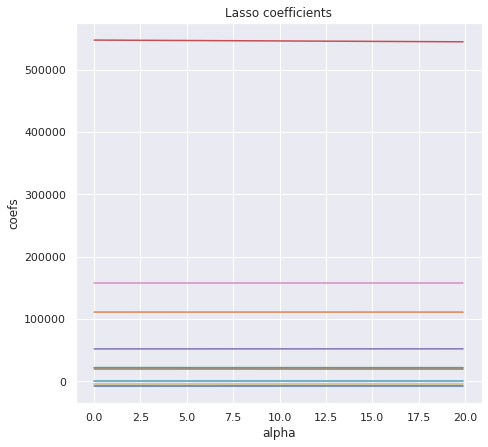

In [100]:
# visualizing 
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Lasso keeps the features that may influence the target variable

## e. Elastic Net Regression

Elastic Net regression is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.It is an extension of linear regression that adds regularization penalties to the loss function during training.

In [101]:
# Importing libraries
from sklearn.linear_model import ElasticNet

In [102]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

51252482759.30696


Let us try elastic net regression and see if the model will improve.

In [103]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [104]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.

search.fit(X,y)
search.best_params_
abs(search.best_score_)

51851102217.69823

The error is above the MSE for the baseline model.This means that elastic net is doing worse than linear regression. we ned to set our hyperparameters to the recommended values and run on the data.


In [105]:
# Getting the best parameters
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [106]:
# Setting our hyperparameters to the recommended vallues
 
elastic=ElasticNet(normalize=True,alpha= 1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

51426735745.7838


In [107]:
# Below are the coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 104690.715392897,
 'bedrooms': -3093.6255854704646,
 'condition': 23675.823382885814,
 'floors': 23581.659395960687,
 'grade': 144657.65652843317,
 'sqft_living15': 92.86615084619142,
 'view': 53341.61527493991,
 'waterfront': 582686.0344780148,
 'yr_built': -3680.65248006865,
 'yr_renovated': 18.679124442572643}

There are no independent variables that have been eliminated, meaning both of them are fit for the analysis and prediction of price. 

# CONCLUSION

The independent variables in the dataset both influence the level of price.

The R-squared value in multiple linear regression explains 60% variability in the price levels. It can however not be used to compare the different regression models.

You cannot use R-squared to determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

There is very high collinearity among the independent variables, meaning one independent variable may interpret the other.

While using the above mentioned regression methods, the error varies significantly depending on the ability to handle multicollinearity.

The different methods of regression are both significant, depending on the objective. For example, if the objective is feature selection, then Lasso regression is the best for the job. However, Elastic net regression is better because it not only does shrinkage but also retains the important features regardless of how much they influence the level of prices.

To improve model efficiency, it is necessary to conduct hyperparameter tuning to get the best parameter for your model.

Since there was a very big error in most models, the reason for that should be investigated further to know how to handle such situations.

# RECOMMENDATION

It is always a good idea to to hyperparameter tuning to get the best results for regression. This minimize error in the model. 